In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime
plt.style.use('ggplot')

In [5]:
loan = pd.read_csv('loan_table.csv',index_col='loan_id')
borrower = pd.read_csv('borrower_table.csv',index_col='loan_id')

In [6]:
loan_all = borrower.join(loan)

In [7]:
loan_all.head()

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,dependent_number,loan_purpose,date,loan_granted,loan_repaid
loan_id,,,,,,,,,,,,,,,
289774,1,NaN,NaN,8000,0.49,3285,1073,0,0,47,3,business,2012-01-31,0,NaN
482590,0,1.0,0.0,4500,1.03,636,5299,1,13500,33,1,investment,2012-11-02,0,NaN
135565,1,NaN,NaN,6900,0.82,2085,3422,1,24500,38,8,other,2012-07-16,1,1.0
207797,0,1.0,0.0,1200,0.82,358,3388,0,0,24,1,investment,2012-06-05,0,NaN
828078,0,0.0,0.0,6900,0.80,2138,4282,1,18100,36,1,emergency_funds,2012-11-28,0,NaN


In [11]:
def profit(row):
    if row['loan_granted'] == 0:
        return 0
    elif row['loan_granted'] == 1:
        if row['loan_repaid'] == 1:
            return 1
        else:
            return -1


In [12]:
loan_all['profit'] = loan_all.apply(profit, axis =1)

In [15]:
loan_all.profit.sum()# bank model profitabality

13758

In [16]:
loan_all.profit.value_counts()

 0    53446
 1    30706
-1    16948
Name: profit, dtype: int64

In [19]:
def should_grant(row):
    if row['loan_repaid'] == 1:
        return 1
    else:
        return 0

In [20]:
loan_all['should_grant'] = loan_all.apply(should_grant, axis =1)

In [24]:
loan_all.fully_repaid_previous_loans = loan_all.fully_repaid_previous_loans.fillna("NA")
loan_all.currently_repaying_other_loans = loan_all.currently_repaying_other_loans.fillna("NA")

In [28]:
fully_repaid_previous_loans = pd.get_dummies(loan_all['fully_repaid_previous_loans'],prefix = 'fully_repaid_previous_loans')
fully_repaid_previous_loans.head()
loan_all = pd.concat([loan_all,fully_repaid_previous_loans],axis = 1)

In [29]:
currently_repaying_other_loans = pd.get_dummies(loan_all['currently_repaying_other_loans'],prefix = 'currently_repaying_other_loans')
currently_repaying_other_loans.head()
loan_all = pd.concat([loan_all,currently_repaying_other_loans],axis = 1)

In [30]:
del loan_all['fully_repaid_previous_loans_NA']
del loan_all['currently_repaying_other_loans_NA']

In [31]:
loan_all.sample(5)

,is_first_loan,fully_repaid_previous_loans,currently_repaying_other_loans,total_credit_card_limit,avg_percentage_credit_card_limit_used_last_year,saving_amount,checking_amount,is_employed,yearly_salary,age,...,loan_purpose,date,loan_granted,loan_repaid,profit,should_grant,fully_repaid_previous_loans_0.0,fully_repaid_previous_loans_1.0,currently_repaying_other_loans_0.0,currently_repaying_other_loans_1.0
loan_id,,,,,,,,,,,,,,,,,,,,,
707202,0,1,1,7100,0.85,109,6439,1,35400,45,...,business,2012-09-03,1,1.0,1,1,0,1,0,1
328400,0,1,0,7800,0.96,4125,7987,1,7700,54,...,home,2012-10-19,1,1.0,1,1,0,1,1,0
484656,1,NA,NA,4600,0.64,2551,3417,1,66300,32,...,business,2012-08-16,1,1.0,1,1,0,0,0,0
308401,1,NA,NA,3000,1.07,815,564,1,14200,19,...,other,2012-01-16,0,NaN,0,0,0,0,0,0
173296,1,NA,NA,4600,1.03,1244,4253,1,45100,29,...,business,2012-09-04,0,NaN,0,0,0,0,0,0


In [32]:
purpose = pd.get_dummies(loan_all['loan_purpose'],prefix = 'loan_purpose')
purpose.head()
loan_all = pd.concat([loan_all,purpose],axis = 1)

In [33]:
del loan_all['loan_purpose_other']

In [34]:
loan_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 289774 to 761999
Data columns (total 25 columns):
is_first_loan                                      101100 non-null int64
fully_repaid_previous_loans                        101100 non-null object
currently_repaying_other_loans                     101100 non-null object
total_credit_card_limit                            101100 non-null int64
avg_percentage_credit_card_limit_used_last_year    94128 non-null float64
saving_amount                                      101100 non-null int64
checking_amount                                    101100 non-null int64
is_employed                                        101100 non-null int64
yearly_salary                                      101100 non-null int64
age                                                101100 non-null int64
dependent_number                                   101100 non-null int64
loan_purpose                                       101100 non-null object
date

In [36]:
loan_all['avg_percentage_credit_card_limit_used_last_year_NA'] = 0

In [43]:
loan_all.loc[loan_all['avg_percentage_credit_card_limit_used_last_year'].isnull(),'avg_percentage_credit_card_limit_used_last_year_NA'] = 1

In [44]:
loan_all['avg_percentage_credit_card_limit_used_last_year_NA'].value_counts()

0    94128
1     6972
Name: avg_percentage_credit_card_limit_used_last_year_NA, dtype: int64

In [45]:
loan_all.avg_percentage_credit_card_limit_used_last_year = loan_all.avg_percentage_credit_card_limit_used_last_year.fillna(0)

In [46]:
loan_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 289774 to 761999
Data columns (total 26 columns):
is_first_loan                                         101100 non-null int64
fully_repaid_previous_loans                           101100 non-null object
currently_repaying_other_loans                        101100 non-null object
total_credit_card_limit                               101100 non-null int64
avg_percentage_credit_card_limit_used_last_year       101100 non-null float64
saving_amount                                         101100 non-null int64
checking_amount                                       101100 non-null int64
is_employed                                           101100 non-null int64
yearly_salary                                         101100 non-null int64
age                                                   101100 non-null int64
dependent_number                                      101100 non-null int64
loan_purpose                                

In [47]:
y = loan_all['should_grant']
X = loan_all[['is_first_loan','total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','saving_amount',
              'checking_amount','is_employed','yearly_salary','age','dependent_number','fully_repaid_previous_loans_0.0',
             'fully_repaid_previous_loans_1.0','currently_repaying_other_loans_0.0','currently_repaying_other_loans_1.0',
             'loan_purpose_business','loan_purpose_emergency_funds','loan_purpose_home','loan_purpose_investment',
             'avg_percentage_credit_card_limit_used_last_year_NA']]

In [49]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

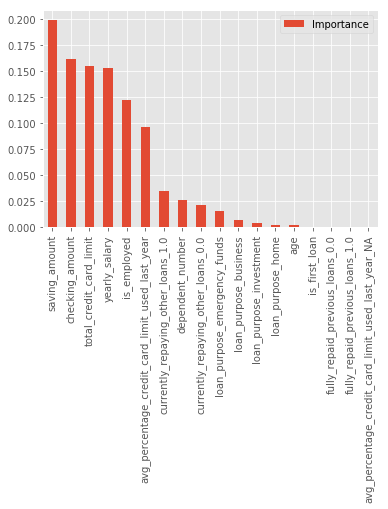

In [50]:
importance_gb = gb.feature_importances_
feature_names = X.columns.values 
df_gb = pd.DataFrame(importance_gb,columns=['Importance'],index = feature_names)
df_gb = df_gb.sort_values(['Importance'],ascending=False)
df_gb.plot(kind = 'bar')

In [53]:
df_gb.head(14)

,Importance
saving_amount,0.198535
checking_amount,0.161118
total_credit_card_limit,0.155163
yearly_salary,0.152621
is_employed,0.122499
avg_percentage_credit_card_limit_used_last_year,0.095849
currently_repaying_other_loans_1.0,0.034490
dependent_number,0.026548
currently_repaying_other_loans_0.0,0.021279
loan_purpose_emergency_funds,0.016055


In [54]:
gb_att = df_gb[df_gb['Importance']>0.01].index.tolist()

In [55]:
X2 = X[gb_att]

In [56]:
from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import KFold
fold = KFold(len(y),n_folds = 5, shuffle = True)
cross_val_score(gb, X2, y, cv = fold, scoring = "roc_auc")

C:\Users\rwang\AppData\Local\Continuum\Miniconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


array([ 0.89692756,  0.89613338,  0.89662637,  0.89600693,  0.89301409])

In [59]:
gb.fit(X2,y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

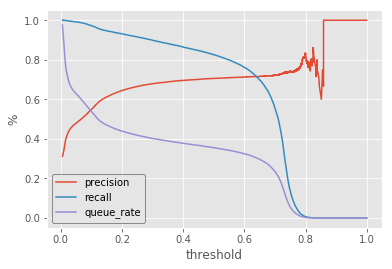

In [60]:
from sklearn.metrics import precision_recall_curve,average_precision_score
y_hat_probability = gb.predict_proba(X2).T[1]
precision, recall, thresholds = precision_recall_curve(y, y_hat_probability) 
thresholds = np.append(thresholds, 1) 
queue_rate = [] 
for threshold in thresholds: 
    queue_rate.append((y_hat_probability >= threshold).mean()) 
plt.plot(thresholds, precision, color=sns.color_palette()[0]) 
plt.plot(thresholds, recall, color=sns.color_palette()[1]) 
plt.plot(thresholds, queue_rate, color=sns.color_palette()[2]) 
leg = plt.legend(('precision', 'recall', 'queue_rate'), frameon=True) 
leg.get_frame().set_edgecolor('k') 
plt.xlabel('threshold') 
plt.ylabel('%')

[ 0.12726332  0.19684195  0.56881672 ...,  0.02239336  0.55082019
  0.70706498]
AUC is 0.900132 


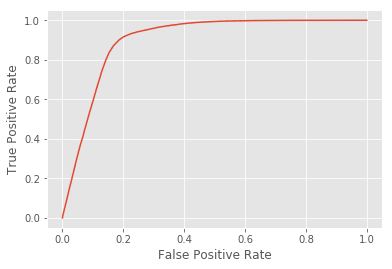

In [61]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = gb.predict_proba(X2).T[1]
print(y_hat_probability)
print("AUC is %f " %roc_auc_score(y, y_hat_probability)) 


vals = roc_curve(y, y_hat_probability) 
#vals[0] is False Positive Rate
#vals[1] is True Positive Rate
plt.plot(vals[0], vals[1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [62]:
y_hat_probability.shape

(101100L,)

In [63]:
loan_all['my_prob'] = y_hat_probability

In [74]:
loan_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101100 entries, 289774 to 761999
Data columns (total 27 columns):
is_first_loan                                         101100 non-null int64
fully_repaid_previous_loans                           101100 non-null object
currently_repaying_other_loans                        101100 non-null object
total_credit_card_limit                               101100 non-null int64
avg_percentage_credit_card_limit_used_last_year       101100 non-null float64
saving_amount                                         101100 non-null int64
checking_amount                                       101100 non-null int64
is_employed                                           101100 non-null int64
yearly_salary                                         101100 non-null int64
age                                                   101100 non-null int64
dependent_number                                      101100 non-null int64
loan_purpose                                

In [90]:
def my_profit_fun(row, prob):
    if row['my_prob'] > prob:
        if row['loan_repaid'] ==1:
            return 1
        elif row['loan_repaid'] ==0:
            return -1
        else:
            return 0
    else:
        return 0

In [95]:

my_profit_dic={'my_profit_sum':[],'my_prob_list':[]}
for prob in np.linspace(0, 1, num=11):
    my_profit = loan_all.apply(lambda row: my_profit_fun(row,prob),axis = 1)
    my_profit_dic['my_profit_sum'].append(my_profit.sum())
    my_profit_dic['my_prob_list'].append(prob)
    
    

In [99]:
pd.DataFrame(my_profit_dic)

,my_prob_list,my_profit_sum
0,0.0,13758
1,0.1,23188
2,0.2,25619
3,0.3,26167
4,0.4,25825
5,0.5,25009
6,0.6,23248
7,0.7,17064
8,0.8,198
9,0.9,0


My highest profit is 26167 compared to bank model's 13758

In [100]:
import statsmodels.api as sm
logit = sm.Logit(y, X2)
y = list(y)
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.479260
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:               101100
Model:                          Logit   Df Residuals:                   101090
Method:                           MLE   Df Model:                            9
Date:                Thu, 12 Oct 2017   Pseudo R-squ.:                  0.2194
Time:                        17:48:49   Log-Likelihood:                -48453.
converged:                       True   LL-Null:                       -62074.
                                        LLR p-value:                     0.000
===================================================================================================================
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
saving_amount                                       0.0002   5.59e-06     27.796      0.000       0.000       0.000
checking_amount                                  6.947e-05   3.79e-06     18.338      0.000     6.2e-05    7.69e-05
total_credit_card_limit                             0.0001   4.08e-06     34.070      0.000       0.000       0.000
yearly_salary                                    2.584e-05   6.51e-07     39.670      0.000    2.46e-05    2.71e-05
is_employed                                         0.6567      0.028     23.817      0.000       0.603       0.711
avg_percentage_credit_card_limit_used_last_year    -2.8494      0.030    -94.361      0.000      -2.909      -2.790
currently_repaying_other_loans_1.0                 -1.4706      0.029    -50.794      0.000      -1.527      -1.414
dependent_number                                   -0.1889      0.003    -65.044      0.000      -0.195      -0.183
currently_repaying_other_loans_0.0                 -0.0788      0.017     -4.597      0.000      -0.112      -0.045
loan_purpose_emergency_funds                       -0.7329      0.023    -32.503      0.000      -0.777      -0.689
===================================================================================================================
"""

if the borrower is employed, it will increase the odds of repaid by 65.67%.

if the average percentage credit card limit used last year increase 1 percent, it will decrease the odds of repaid by 284.94%, which is very huge impact.

more attributes: marriage, house owner, education, deliquency, inquery and etc...